In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from IPython.display import display
import statsmodels.api as sm

# 3. 回归分析的重要任务——推断/假设检验

我们用一个例子引出回归分析中推断任务的意义。

**· Example3.** 依旧以上面的大学成绩例子为例。我们有一个直觉：成绩较好的学生似乎更倾向于不旷课，因此我们想知道旷课究竟会不会影响考试成绩。由于考试成绩取决于很多因素，我们要评价旷课(skipped)对成绩的影响，就需要建立一个多元线性回归模型，以控制其他因素的影响。通过OLS估计，方程结果如下
$$
\mathrm{colGPA}=1.390+0.412\mathrm{hsGPA}+0.015\mathrm{ACT}-0.083\mathrm{skipped}+u
$$
接下来的问题是，旷课skipped这一因素怎样子才能算是影响考试成绩呢？显然，如果它的系数非常接近0，那么它对成绩的影响是不明显的，换言之，是**不显著的**。事实上，我们后续在回归分析中所提及的“系数显著性”，本质上都是“**系数不为0的显著性**”。

完成了旷课对成绩“显著影响”的解读，我们还需要解答最后一个问题：一个系数怎样子才算是接近0呢？skipped的系数是-0.083，它算是接近于0吗？显然我们无法回答这个问题，这个时候我们就需要借助概率论与数理统计中假设检验的知识来回答这一问题了！

## 3.1 t检验

t检验是回归分析中单个线性假设检验问题的常用检验方法。单个线性假设检验问题可分为如下：

· **单参数检验问题**：$H_{0}: \beta_{j}=\beta_{j 0} \leftrightarrow H_{1}: \beta_{j} \neq \beta_{j 0}$（$\beta_{j 0}$为任意常数）

这类问题的典型问题就是系数的显著性检验$H_{0}: \beta_{j}=0 \leftrightarrow H_{1}: \beta_{j} \neq 0$

· **参数线性组合检验问题**：$H_0:f\left( \beta \right) =\beta _0\leftrightarrow H_1:f\left( \beta \right) \ne \beta _0$（$\beta_{0}$为任意常数）

这类问题的典型问题就是系数间的相等性检验$H_0:\beta _i=\beta _j\leftrightarrow H_1:\beta _i\ne \beta _j$

### 3.1.1 t检验的思想-从单参数检验说起

有关假设检验严格的理论推导，大家可参考概率论与数理统计中的假设检验部分，在此我们只对其思想进行简单的介绍。

正如上面介绍的，回归系数的显著性检验就是“系数是否为0”的检验
$$
H_{0}: \beta_{j}=0 \leftrightarrow H_{1}: \beta_{j} \neq 0
$$
如何根据样本数据对这一问题作出结论呢？我们的想法是，既然$\hat{\beta_{j}}$是$\beta_{j}$的无偏估计，那么如果原假设成立，即真的有$\beta_{j}=0$，那么$\hat{\beta_{j}}$有很大的可能性位于0附近；相反，如果实际样本计算出的$\hat{\beta_{j}}$远离0，那么这个假设**有很大可能不成立**。为了有一个确定的答案，我们设立一个临界值$C$，若$\left|\hat{\beta}_{j}-0\right|>C$，我们就拒绝假设$H_0$

**· 临界值与显著性水平**

接下来的问题是，如何确定$C$呢？用概率。

由于抽样的随机性，我们根据$\hat{\beta_{j}}$判断$\beta_{j}$的命题，不论拒绝与否，都**有概率**会犯以下两类错误的其中之一：

· 第一类错误，即原假设成立但是我们拒绝了它。犯第一类错误的概率称为拒真概率。

· 第二类错误，即原假设不成立但是我们没有拒绝它。

我们定夺临界值的时候，要保证发生第一类错误的概率需要在一个给定的、较小的水平$\alpha$，这个$\alpha$也被称为显著性水平。如此以来，我们考虑临界值$C$的判准是，原假设$H_{0}$成立但是$\left|\hat{\beta}_{j}-\hat{\beta}_{j0}\right|>C$（因而拒绝原假设$H_{0}$）的概率应当恰好为我们人为给定的$\alpha$，即
$$
P_{H_0\,\,is\,\,true}\left( \left| \hat{\beta}_j-\beta _{j0} \right|>C \right) =P\left( \left| \hat{\beta}_j-0 \right|>C \right) =\alpha 
$$

**· 用t分布处理概率**

现在我们就要开始处理$P\left(\left|\hat{\beta}_{j}-0\right|>C\right)$了。

在前面的OLS估计的正态分布性质中我们得知$\frac{\hat{\beta}_{j}-\beta_{j}}{\operatorname{se}\left(\hat{\beta}_{j}\right)} \sim t_{n-k-1}$，而在原假设$H_{0}$成立时$\beta_j=0$，因此$\frac{\hat{\beta}_j}{\mathrm{se}\left( \hat{\beta}_j \right)}\sim t_{n-k-1}$，我们便可以使用t分布处理以上概率
$$
P\left(\left|\hat{\beta}_{j}\right|>C\right)=P\left(\frac{\left|\hat{\beta}_{j}\right|}{\operatorname{se}\left(\hat{\beta}_{j}\right)}>\frac{C}{\operatorname{se}\left(\hat{\beta}_{j}\right)}\right)=\alpha
$$
由于$\frac{\hat{\beta}_j}{\mathrm{se}\left( \hat{\beta}_j \right)}$服从自由度为$n-k-1$的t分布，因此要让概率为$\alpha$，$\frac{C}{\mathrm{se}\left( \hat{\beta}_j \right)}$应等于$1-\frac{\alpha}{2}$分位点，记为$t_{n-k-1}\left( 1-\frac{\alpha}{2} \right) $

于是，$C=t_{n-k-1}(1-\alpha /2)\mathrm{se}\left( \hat{\beta}_j \right) $，如果我们计算出来的$\hat{\beta_j}$有：$\left| \hat{\beta}_j \right|>t_{n-k-1}(1-\alpha /2)\mathrm{se}\left( \hat{\beta}_j \right) $，那么我们便可以拒绝原假设，这个系数是显著的！

当然，在python实现的时候，我们不会直接比较临界值$C$与$|\hat{\beta}_j|$(因为计算$C$很麻烦)，而是先计算$\frac{\hat{\beta}_{j}-\beta_{j}}{\operatorname{se}\left(\hat{\beta}_{j}\right)}$，再与python输出的t分布对应的双侧分位点值$\pm {t_{n-k-1}\left( 1-\frac{\alpha}{2} \right)} $进行比较。

接下来，我们先进行手动假设检验，检验的问题为：
$$
H_{0}: \beta_{3}=0 \leftrightarrow H_{1}: \beta_{3} \neq 0
$$
显著性水平为0.05

In [10]:
# 加载数据
gpa1=pd.read_stata('./data/gpa1.dta')

In [11]:
# 手动进行假设检验
gpa_lm3=sm.formula.ols('colGPA~hsGPA+ACT+skipped',data=gpa1).fit()

## 计算t值
skipped=gpa_lm3.params[3]
se_skipped=gpa_lm3.bse[3]
tvalue=skipped/se_skipped

## 计算分位点
from scipy.stats import t
'''
ppf:单侧左分位点
isf:单侧右分位点
interval:双侧分位点
'''
T_int=t.interval(0.95,gpa_lm3.df_resid) # 对于双侧检验（双侧分位点），分位点参数应该输入1-a，这里是1-0.05=0.95
print('双侧分位点为：{}'.format(T_int))
print('t值为：{}'.format(tvalue))
print('t值小于左侧分位点，位于拒绝域，因此在0.05的显著性水平可以拒绝原假设，即skipped系数不为0.')

双侧分位点为：(-1.9774312122928936, 1.9774312122928936)
t值为：-3.1968396347468295
t值小于左侧分位点，位于拒绝域，因此在0.05的显著性水平可以拒绝原假设，即skipped系数不为0.


当然，我们检验的问题还可以变为
$$
H_{0}: \beta_{3}=-0.1 \leftrightarrow H_{1}: \beta_{3} \neq -0.1
$$
我们只需要变更t值而不需要变更t分位点值。

In [12]:
tvalue=(skipped+0.1)/se_skipped
print('t值为：{}'.format(tvalue))
print('此时t值小于右侧分位点但大于左侧分位点，位于接受域，不能拒绝原假设，即skipped系数可为-0.1')

t值为：0.6495314591856147
此时t值小于右侧分位点但大于左侧分位点，位于接受域，不能拒绝原假设，即skipped系数可为-0.1


**· 单边检验——换汤不换药**

上面我们介绍的是t检验的双边检验，它的假设是这样的
$$H_{0}: \beta_{j}=\beta_{j 0} \leftrightarrow H_{1}: \beta_{j} \neq \beta_{j 0}$$
双边检验回答的问题是：实际参数是否“靠近”我们假设的值。而有时候我们回归分析中可能还会有这样的问题：某某自变量对因变量是否存在正效应影响呢？这个问题其实等价于下面的假设
$$
H_0:\beta _j=\beta _{j0}\leftrightarrow H_1:\beta _j>\beta _{j0}\,\,\left( \beta _{j0}=0 \right) 
$$
单边检验的分析思路和双边检验基本一样，只不过$P\left(\left|\hat{\beta}_{j}-0\right|>C\right)$要变为$P\left( \hat{\beta}_j-0>C \right) $，$\frac{C}{\operatorname{se}\left(\hat{\beta}_{j}\right)}$也应从$1-\frac{\alpha}{2}$分位点变为$1-\alpha $分位点(大家可以思考一下为什么)


接下来，我们依旧进行手动检验，检验问题为
$$
H_0:\beta _j=0\leftrightarrow H_1:\beta _j<0
$$
显著性水平为0.05

In [13]:
tvalue=skipped/se_skipped
# 因为是小于，因此看左分位点
T_right=t.ppf(0.05,gpa_lm3.df_resid) # 对于单侧检验，分位点参数应该输入a，这里是0.05
print('左侧分位点为：{}'.format(T_right))
print('t值为：{}'.format(tvalue))
print('t值小于左侧分位点，位于拒绝域，因此在0.05的显著性水平可以拒绝原假设，即skipped系数小于0.')


左侧分位点为：-1.6560520804924401
t值为：-3.1968396347468295
t值小于左侧分位点，位于拒绝域，因此在0.05的显著性水平可以拒绝原假设，即skipped系数小于0.


**· p值**

用临界值$C$与$\left|\hat{\beta}_{j}-\hat{\beta}_{j0}\right|$作比较有一个缺点，就是分位点值与显著性水平$\alpha$相关的。如果我们要在不同的显著性水平下检验，就需要计算不同的分位点再比较，这样很繁琐。这个时候，我们可以使用p值。

p值是在本次分析的样本观测值下，给出的能拒绝原假设的最小显著性水平，它只与样本观测值和我们做的假设检验有关。p值越小越可以拒绝原假设，例如：如果p值为0.001，比0.01的显著性水平还要小，我们认为在0.01的显著性水平下我们也可以拒绝原假设；而如果p值为0.025，比0.01的显著性水平要大，但小于0.05，则我们认为在0.05的显著性水平下我们可以拒绝原假设，但在0.01显著性水平下不可以拒绝。

p值的形式与我们做的备择假设$H_1$有关：

· 若$H_{1}: \beta_{j} \neq \beta_{j 0}$，则：$pvalue=P\left( \left| t_{n-k-1} \right|>\left| \frac{\hat{\beta}_j-\beta _{j0}}{se\left( \hat{\beta}_j \right)} \right| \right) $

· 若$H_{1}: \beta_{j} > \beta_{j 0}$，则：$pvalue=P\left( t_{n-k-1}>\frac{\hat{\beta}_j-\beta _{j0}}{se\left( \hat{\beta}_j \right)} \right) $

· 若$H_{1}: \beta_{j} < \beta_{j 0}$，则：$pvalue=P\left( t_{n-k-1}<\frac{\hat{\beta}_j-\beta _{j0}}{se\left( \hat{\beta}_j \right)} \right) $

可以看到，p值本质上是一种累积概率，且对于同一个$\beta_{j 0}$而言，双边检验的p值为单边检验的两倍（在代码实现中我们可以看到这点）。我们先利用p值手动检验以下问题
$$
H_{0}: \beta_{3}=0 \leftrightarrow H_{1}: \beta_{3} \neq 0
$$

In [14]:
# 计算t值仍然是第一步
tvalue=skipped/se_skipped
print('由于双边检验p值是对单边检验p值乘两倍得来的，我们要根据t值是否大于0来选择左/右尾累积概率，若小于0，则选择左尾；反之右尾。')
'''
sf:右尾累积概率
cdf:左尾累积概率
'''
print(tvalue<0)
pvalue=t.cdf(tvalue,gpa_lm3.df_resid)*2 # 双边p值记得乘2
print('p值为：{:.3f}'.format(pvalue)) # 保留三位小数
print('p值非常小，可见我们可以拒绝原假设')

由于双边检验p值是对单边检验p值乘两倍得来的，我们要根据t值是否大于0来选择左/右尾累积概率，若小于0，则选择左尾；反之右尾。
True
p值为：0.002
p值非常小，可见我们可以拒绝原假设


事实上，summary中的p值，正是系数0值双边检验的p值，我们查看一下

In [15]:
print(gpa_lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                 colGPA   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     13.92
Date:                Wed, 07 Sep 2022   Prob (F-statistic):           5.65e-08
Time:                        10:49:58   Log-Likelihood:                -41.501
No. Observations:                 141   AIC:                             91.00
Df Residuals:                     137   BIC:                             102.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3896      0.332      4.191      0.0

当然，对于系数的非0值单边检验，我们也可以进行手动检验，考虑下面问题
$$
H_{0}: \beta_{3}=-0.1 \leftrightarrow H_{1}: \beta_{3} > -0.1
$$

In [16]:
# 还是先计算t值！
tvalue=(skipped+0.1)/se_skipped
pvalue=t.sf(tvalue,gpa_lm3.df_resid) # 由于备择假设是大于号，因此要用右尾累积概率，且不用乘2
print('p值为：{:.3f}'.format(pvalue)) # 保留三位小数
print('p值远大于0.1，可见我们不能拒绝原假设')

p值为：0.259
p值远大于0.1，可见我们不能拒绝原假设


### 3.1.2 参数线性组合的检验-巧用模型变式

前面的t检验里，我们进行的检验都是对单个参数的检验。事实上，如果我们要对多个参数之间的关系进行假设检验，也可以用t检验，这个时候，我们本质上是对参数的线性组合进行检验。我们依旧用一个例子引入该问题。

**· Example4.** 我们现在探讨一个有关薪酬的问题，想看看哪些因素会影响我们的薪酬。经过一番思考，我们先将模型设置为

$$
\log (\text { wage })=\beta_{0}+\beta_{1} j c+\beta_{2} u n i v+\beta_{3} \operatorname{exper}+u
$$
其中，jc表示为大专教育年限，univ为大学教育年限，exper为工作年限。我们想知道：大专学历的边际回报是否不如大学学历的边际回报，这等价于下面的假设检验
$$
H_{0}: \beta_{1}=\beta_{2} \leftrightarrow H_{1}: \beta_{1}<\beta_{2}
$$
而这又可以变形为
$$
H_0:\beta _1-\beta _2=0\leftrightarrow H_1:\beta _1-\beta _2<0
$$
我们依旧可以采用前面的思路，先构造t检验统计量
$$
t=\frac{\hat{\beta}_1-\hat{\beta}_2}{se\left( \hat{\beta}_1-\hat{\beta}_2 \right)}
$$
再根据t分布求得p值即可。问题是$se\left( \hat{\beta}_1-\hat{\beta}_2 \right)$的求解不那么容易，需要使用协方差矩阵$Cov\left( \vec{\hat{\beta}} \right) $内的方差与协方差。当线性组合变得复杂的时候，这样的任务将变得更加困难。于是我们另辟蹊径，用一种很巧妙的方法完成这类假设检验。

**· 巧变模型**

既然假设检验的问题是
$$
H_{0}: \beta_{1}=\beta_{2} \leftrightarrow H_{1}: \beta_{1}<\beta_{2}
$$
我们干脆令$\theta_{1}=\beta_{1}-\beta_{2}$，于是$\beta_{1}=\theta_{1}+\beta_{2}$，将其代入到原式中并将带有系数$\theta _1$的一项提出来，得
$$
\log (\text { wage })=\beta_{0}+\theta_{1} j c+\beta_{2}(j c+\text { univ })+\beta_{3} \operatorname{exper}+u
$$
记$j c+u n i v= totcoll$，是两个变量之和，此时模型简化为
$$
\log (\text { wage })=\beta_{0}+\theta_{1} \text { jc }+\beta_{2} \text { totcoll }+\beta_{3} \text { exper }+u
$$
原检验问题也变为了
$$
H_{0}: \theta=0 \leftrightarrow H_{1}: \theta<0
$$
此时，问题有转化为了对**新模型**的单个参数的显著性检验问题。注意，这个新模型的意义仅仅只在于做假设检验，虽然两个模型实际上是等价的。（大家可以比较两者其他的输出）

接下来进行python实操演练。

In [17]:
wage1=pd.read_stata('./data/twoyear.dta')
wage1.head()

,female,phsrank,BA,AA,black,hispanic,id,exper,jc,univ,...,medcity,submed,lgcity,sublg,vlgcity,subvlg,ne,nc,south,totcoll
0,1,65,0,0,0,0,19.0,161,0.000000,0.000000,...,0,0,0,1,0,0,1,0,0,0.000000
1,1,97,0,0,0,0,93.0,119,0.000000,7.033333,...,0,0,0,0,0,0,0,1,0,7.033333
2,1,44,0,0,0,0,96.0,81,0.000000,0.000000,...,0,0,0,1,0,0,1,0,0,0.000000
3,1,34,0,0,0,1,119.0,39,0.266667,0.000000,...,0,0,0,0,0,0,0,0,0,0.266667
4,1,80,0,0,0,0,132.0,141,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0.000000


In [18]:
'''
sm.formula.ols与sm.ols不同，其最大的特点是可以指定模型的形式，这非常有利于我们自主的构建模型，此后我们将统一使用该指令。
值得注意的是，sm.formula.ols默认带截距项
'''
wage1_lm=sm.formula.ols('lwage~jc+I(jc+univ)+exper',data=wage1).fit()
# 注意，如果我们要将jc与univ的和当做一个新变量的话，需要使用I()
print(wage1_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     644.5
Date:                Wed, 07 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:49:59   Log-Likelihood:                -3888.7
No. Observations:                6763   AIC:                             7785.
Df Residuals:                    6759   BIC:                             7813.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.4723      0.021     69.910   

这里告诉大家巧用summary中的双侧p值进行单侧0值检验的小技巧。在summary中，jc的t值小于0，说明它后面的双侧p值是使用左侧累积概率乘两倍得来的，而在本例中我们的备择假设是小于0，p值也应当是左侧累积概率，因此我们只需将报告表中的p值除以2即可。而如果t值小于0，但是备择假设却大于0，那么无需思考，p值一定大于0.5，我们肯定不能拒绝原假设。

在本例中，由于我们做的是小于0的假设，jc的t值也小于0，因此这一假设检验的p值应当为0.142/2=0.071。


# 3.2 F检验

F检验是回归分析中**多个**线性假设检验问题的常用检验方法。多个线性假设检验问题可分为如下：

· **多参数联合显著性检验问题**：$H_{0}: \beta _i=\cdots =\beta _j=0 \leftrightarrow H_{1}: $ $H_{0}$不成立

· **一般多参数检验问题**：$H_0:\beta _n=\beta _{n0}\,\,, \beta _i=\cdots =\beta _j=0\leftrightarrow H_1: $ $H_{0}$不成立

### 3.2.1 F检验的思想

在实际问题的假设检验中，我们除了对某个参数单独进行检验外，还需要对多个参数同时进行检验，我们用一个例子来说明。

**· Example5.** 考虑美国棒球职业大联盟的运动员薪水问题，假设模型为
$$
\log (\text { salary })=\beta_{0}+\beta_{1} \text { years }+\beta_{2} \text { gamesyr }+\beta_{3} \text { bavg }+\beta_{4} \text { hrunsyr }+\beta_{5} \text { rbisyr }+u
$$
其中，salary是队员薪水，years为加入联盟的年限，gamesyr为每年参加比赛的次数，bavg是击球率，hrunsyr为本垒打次数，rbisyr表示击球跑垒得分。后面三个指标是运动员的球场表现正向指标（指标越高，代表表现越好），而前面两个指标则为运动员的球场资历指标。

我们想弄明白一个问题：运动员的表现正向指标是否对薪水有显著影响。如何理解这一问题？如果这三个指标中至少有一个指标系数显著不为0，我们便可以认为表现正向指标对薪资有显著影响。于是原假设可以设置为
$$
H_{0}: \beta_{3}=0, \beta_{4}=0, \beta_{5}=0
$$
对立假设则为：原假设不成立。

注意，三个参数做联合显著性检验**完全不等价于**三个参数分开做显著性t检验！如果我们是出于联合检验的目的但是却做了分开检验，将大大增加拒真概率。由于无法分开始用t检验进行联合检验，我们需要一种新的检验方法——F检验。

**· F统计量的定义——约束模型与无约束模型的比较**

**在回归分析中**，F检验更像是在比较两种模型的差异程度。

首先，我们称原模型为无约束模型(unrestricted model)：
$$
\log (\text { salary })=\beta_{0}+\beta_{1} \text { years }+\beta_{2} \text { gamesyr }+\beta_{3} \text { bavg }+\beta_{4} \text { hrunsyr }+\beta_{5} \text { rbisyr }+u
$$
然后将原假设$H_0$成立下的条件代入无约束模型，得到的模型称为有约束模型(restricted model)：
$$
\log (\text { salary })=\beta_{0}+\beta_{1} \text { years }+\beta_{2} \text { gamesyr }+u
$$
无约束模型相较于有约束模型多了三个参数与变量。一般而言，模型变量越多，对训练集数据的变异解释程度会越高，拟合优度会越好，进而残差平方和会减小。**如果两个模型残差平方和的差异足够大，说明原假设约束的加入是模型产生了显著性的变化，这意味着原假设是显著的！**

基于这种思考，统计学家们定义了回归分析中的F检验统计量
$$
F=\frac{\left( RSS_r-RSS_{ur} \right) /q}{RSS_{ur}/(n-k-1)}\sim F_{q,n-k-1}
$$
它服从自由度为$q$与$n-k-1$的F分布，其中$q$为有效约束个数，$n-k-1$为无约束模型自由度。

F检验拒绝原假设的判别规则非常简单，即
$$
F>F_{q,n-k-1}\left( 1-\alpha \right) 
$$

接下来我们进行F联合检验的python实现。

In [19]:
# 载入数据集
mlb1=pd.read_stata('./data/mlb1.dta')
mlb1.head()

,salary,teamsal,nl,years,games,atbats,runs,hits,doubles,triples,...,runsyr,percwhte,percblck,perchisp,blckpb,hispph,whtepw,blckph,hisppb,lsalary
0,6329213.0,38407380.0,1.0,12.0,1705.0,6705.0,1076.0,1939.0,320.0,67.0,...,89.666656,70.277969,18.844231,10.8778,0.000000,0.0,70.277969,0.0000,0.0,15.66069
1,3375000.0,38407380.0,1.0,8.0,918.0,3333.0,407.0,863.0,156.0,38.0,...,50.875000,70.277969,18.844231,10.8778,18.844231,0.0,0.000000,10.8778,0.0,15.03191
2,3100000.0,38407380.0,1.0,5.0,751.0,2807.0,370.0,840.0,148.0,18.0,...,74.000000,70.277969,18.844231,10.8778,0.000000,0.0,70.277969,0.0000,0.0,14.94691
3,2900000.0,38407380.0,1.0,8.0,1056.0,3337.0,405.0,816.0,143.0,18.0,...,50.625000,70.277969,18.844231,10.8778,0.000000,0.0,70.277969,0.0000,0.0,14.88022
4,1650000.0,38407380.0,1.0,12.0,1196.0,3603.0,437.0,928.0,19.0,16.0,...,36.416672,70.277969,18.844231,10.8778,18.844231,0.0,0.000000,10.8778,0.0,14.31629


先进行手动假设检验。

In [20]:
# 无约束模型
mlb_ur=sm.formula.ols('lsalary~years+gamesyr+bavg+hrunsyr+rbisyr',data=mlb1).fit()
# 有约束模型
mlb_r=sm.formula.ols('lsalary~years+gamesyr',data=mlb1).fit()

# 计算两个模型的RSS
RSS_mlb_ur=np.sum(np.power(mlb_ur.resid,2))
RSS_mlb_r=np.sum(np.power(mlb_r.resid,2))

# 计算F统计量
Fvalue=((RSS_mlb_r-RSS_mlb_ur)/3)/(RSS_mlb_ur/(mlb_ur.df_resid))
print('F值为：{}'.format(Fvalue))

# 计算F分布分位点
from scipy.stats import f
# 由于F检验只有大于号的假设，因此只会使用单侧右分位点
F_isf=f.isf(0.05,3,mlb_ur.df_resid) # 注意自由度的顺序不能颠倒,这里显著性水平为0.05
print('F分位点为：{}'.format(F_isf))
print('F值位列分位点右侧，说明位于拒绝域当中，可以在显著性水平0.05下拒绝原假设')

# 计算p值
# 由于F检验只有大于号的假设，因此只会使用单侧右分位点
pvalue=f.sf(Fvalue,3,mlb_ur.df_resid)
print('p值为：{:.6f}'.format(pvalue))


F值为：9.550271724244377
F分位点为：2.6306414891156504
F值位列分位点右侧，说明位于拒绝域当中，可以在显著性水平0.05下拒绝原假设
p值为：0.000004


我们也可以直接使用anova_lm函数，它会直接输出F值与p值，非常方便。

In [21]:
from statsmodels.stats.anova import anova_lm
anova_lm(mlb_r,mlb_ur) # 注意，是有约束在前，无约束在后

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,350.0,198.311502,0.0,NaN,NaN,NaN
1,347.0,183.186322,3.0,15.12518,9.550272,0.000004


**· 一般多参数检验问题**

除了全零假设，原假设还可以更一般地设置为
$$
H_0:\beta _n=\beta _{n0}\,\,, \beta _i=\cdots =\beta _j=0
$$
即，部分假设可以设置为非0参数。对于这种检验问题，我们的有约束模型需要将假设中非0参数的变量移至因变量一侧。例如，若假设为
$$
H_{0}: \beta_{3}=1, \beta_{4}=0, \beta_{5}=0
$$
则有约束模型为
$$
\log (\text { salary })-\text{bavg}=\beta_{0}+\beta_{1} \text { years }+\beta_{2} \text { gamesyr }+u
$$
这意味着有约束模型的因变量发生了改变。

In [22]:
hprice1=pd.read_stata('./data/hprice1.dta')
hprice1.head()

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
0,300.0,349.100006,4,6126.0,2438,1,5.703783,5.855359,8.720297,7.798934
1,370.0,351.500000,3,9903.0,2076,1,5.913503,5.862210,9.200593,7.638198
2,191.0,217.699997,3,5200.0,1374,0,5.252274,5.383118,8.556414,7.225482
3,195.0,231.800003,3,4600.0,1448,1,5.273000,5.445875,8.433811,7.277938
4,373.0,319.100006,4,6095.0,2514,1,5.921578,5.765504,8.715224,7.829630


In [23]:
hprice_ur=sm.formula.ols('lprice~lassess+llotsize+lsqrft+bdrms',data=hprice1).fit()
hprice_r=sm.formula.ols('I(lprice-lassess)~1',data=hprice1).fit() 
# 注意，将lassess移至因变量后，它们的差应视作一个整体回归元，因此需要添加I()
anova_lm(hprice_r,hprice_ur) # 注意，是有约束在前，无约束在后
print('p值远大于0.1，不能拒绝原假设')

p值远大于0.1，不能拒绝原假设


# 4. 更广义的“线性”回归——多种形式自变量

在前面的章节，我们学习了最经典、最简单的多元线性回归模型
$$
y=\beta_{0}+\beta_{1} x_{1}+\beta_{2} x_{2}+\cdots+\beta_{k} x_{k}+u
$$
为了大家在学习之初不被混淆，我们其实默认了自变量都是一次项的、定量的变量。实际上，自变量不仅可以是一次的连续变量，还可以是一种**定性变量**，也可以是某个**变量的函数**，如二次项$X^2$、对数项$log(X)$。这是因为，所谓的线性回归模型，线性关系并不是指代被解释变量$y$与解释变量$X$之间的关系，而是指回归函数相对于**回归系数**是线性的。

在这一章节，我们将重点学习带有定性变量的回归，并简单介绍常用的带有变量函数的回归（如带有对数项）。

## 4.1 带有定性变量的回归分析

之前我们所考虑的模型里的变量都是定量变量，如：工资，产品销售量等，其取值有大小的区分。而在实际问题中，还有一些诸如性别、种族、季节、婚姻状态等定性变量，也称为类别变量。我们只讨论自变量带有定性变量的情况，不讨论因变量是定性变量的情况，因为此时问题将变为分类问题而非回归问题。

我们先讨论最简单的二分类变量，再讨论多分类变量。

### 4.1.1 二分类变量

**· 定性变量定量化——虚拟变量**

定性变量的取值一般都不是数字，如性别变量的取值为男/女、婚姻状态的取值为是/否，计算机肯定是无法识别这些非数字的，这个时候我们就要将它们定量化了！

最方便也是最高效的定量化就是用0-1变量定义二分类变量。一般而言，0表示“否”，1表示“是”，对于性别$sex$这个变量，我们可以将其转化一个“女士变量”$female$，当$female=1$时表示样本为女士，当$female=0$时表示样本为男士。当然，我们定义$sex=0$为男士，$sex=1$为女士也是完全没问题的。

这种替代定性变量性别的$female$变量被称为虚拟变量/哑变量(Dummy Variable)。

**· 定性变量系数的解读**

明确了0-1虚拟变量的含义，我们便可以研究虚拟变量在回归中的含义了。我们依旧用一个例子代入讨论，让大家可以更直观地理解。

**· Example6.** 我们想知道男女在职场上是否存在薪资不平等的情况，就要在控制其他变量的前提下，观察性别差异给薪资带来的影响。我们考虑下述模型
$$
\text { wage }=\beta_{0}+\delta_{0} \text { female }+\beta_{1} e d u c+u
$$
如何理解定性变量的回归系数$\delta_{0}$呢，我们知道当$female=1$时表示样本为女性，当$female=0$时表示样本为男性，于是男性的回归函数为
$$
E(\text { wage } \mid \text { male }, e d u c)=\beta_{0}+\beta_{1} \text { educ }
$$
女性的回归函数为
$$
E\left(\text { wage }[\text { female }, \text { educ })=\beta_{0}+\delta_{0}+\beta_{1} e d u c\right.
$$
它们直观的区别如下图所示。



<img src='./images/定性.png'>
两者相差的数值处处为常数，它们的差本质上源于截距的不同

那么，$\delta_{0}$就是
$$
\delta_{0}=E(\text { wage|female }, e d u c)-E(\text { wage|male, educ })
$$
因此，$\delta_{0}$表示的是在同等受教育水平下，女性与男性的工资差异。而如果$\delta_{0}<0$，就说明同等教育水平下，女性工资比男性工资低，职场可能存在性别歧视。我们用python就该问题做一次假设检验

In [24]:
wage1=pd.read_stata('./data/wage1.dta')
wage1.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11.0,2.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.131402,4.0,0.0
1,3.24,12.0,22.0,2.0,0.0,1.0,1.0,3.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.175573,484.0,4.0
2,3.00,11.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.098612,4.0,0.0
3,6.00,8.0,44.0,28.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.791759,1936.0,784.0
4,5.30,12.0,7.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.667707,49.0,4.0


In [25]:
wage1_lm=sm.formula.ols('wage~female+educ+exper+tenure',data=wage1).fit()
print(wage1_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     74.40
Date:                Wed, 07 Sep 2022   Prob (F-statistic):           7.30e-50
Time:                        10:50:00   Log-Likelihood:                -1314.2
No. Observations:                 526   AIC:                             2638.
Df Residuals:                     521   BIC:                             2660.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5679      0.725     -2.164      0.0

由于我们做的是0值单边假设，因此可以通过summary汇总表中的p值判断。female的t值小于0，因此其p值采用的是左尾累积概率；而我们的假设是小于0假设，也采用的是左尾累积概率，因此我们只需要将报告表中的p值除以2即可。显然，female的p值在保留三位小数的前提下依旧为0.000，因此它除以2后一定也为0.000，我们可以拒绝原假设，职场上男女薪资存在不平等现象。

**· 交互效应模型——定性变量间的交互效应**

**· Example7.** 承接example.6，我们除了考虑性别的影响外，还决定同时考察婚姻状况对薪资的影响。考虑一下模型
$$
\log (\text { wage })=\beta_{0}+\delta_{0} \text { female }+\gamma_{0} \text { married }+\beta_{1} \text { educ }+\beta_{2} \text { exper }+\beta_{3} \text { exper }{ }^{2}+\beta_{4} \text { tenure }+\beta_{5} \text { tenure }{ }^{2}+u
$$
在这个模型中，人群被分为四个类别：单身男性、单身女性、已婚男性、已婚女士。他们在薪资上的区别依旧可以用回归函数表示出来
$$
\begin{gathered}
E(\log (\text { wage }) \mid \text { male }, \text { single }, x)=h(x) \\
E(\log (\text { wage }) \mid \text { female, single }, x)=\delta_{0}+h(x) \\
E(\log (\text { wage }) \mid \text { male }, \text { married }, x)=\gamma_{0}+h(x) \\
E(\log (\text { wage }) \mid \text { female }, \text { married }, x)=\delta_{0}+\gamma_{0}+h(x)
\end{gathered}
$$
其中，$h(x)$在这里表示模型中不含定性变量的部分。

我们可以清楚地看到，不论是未婚还是已婚，性别差异都是$\delta_{0}$；不论是男性还是女性，结婚与否的差异都是$\gamma_{0}$。大家稍加思考一下可能可以发现，这里面暗示着这两个定性因素彼此互不相关。在这个模型下，男性结婚与否的差异，与女性结婚与否的差异是相同的。

但在现实中，这一假设未必成立。相对于男性而言，婚姻给女性在职场上带来的影响可能相对较大，这意味着这两种定性因素相互之间存在交互效应。而要在模型中体现出这种交互效应，我们需要在**原模型**的基础上加上它们的交互乘积项
$$
\log (\text { wage })=\beta_{0}+\delta_{0} \text { female }+\gamma_{0} \text { married }+ \delta_{\gamma} \text { female } * \text { married }+\beta_{1} \text { educ }+\beta_{2} \text { exper }+\beta_{3} \text { exper }{ }^{2}+\beta_{4} \text { tenure }+\beta_{5} \text { tenure }{ }^{2}+u
$$
在这个模型下，单身男性、单身女性、已婚男性、已婚女士的薪资区别就变成了
$$
\begin{array}{c}
E(\log (\text { wage }) \mid \text { male, single }, x)=h(x) \\
E(\log (\text { wage }) \mid \text { female single, } x)=\delta_{0}+h(x) \\
E(\log (\text { wage }) \mid \text { male, married, } x)=\gamma_{0}+h(x) \\
E(\log (\text { wage }) \mid \text { female, married }, x)=\delta_{0}+\gamma_{0}+\delta_{y}+h(x)
\end{array}
$$
于男性而言，婚姻差异为$\gamma_{0}$，而对于女性而言，婚姻带来的影响是$\gamma_{0}+\delta_{\gamma}$

In [26]:
wage1_lm2=sm.formula.ols('lwage~female+married+educ+I(female*married)+exper+I(exper**2)+tenure+I(tenure**2)',data=wage1).fit()
print(wage1_lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     55.25
Date:                Wed, 07 Sep 2022   Prob (F-statistic):           1.28e-64
Time:                        10:50:00   Log-Likelihood:                -250.96
No. Observations:                 526   AIC:                             519.9
Df Residuals:                     517   BIC:                             558.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.3214    

p值显示，交互项十分显著，性别与婚姻状况确实存在交互效应；再看看系数：于男性而言，已婚人士平均工资比维护人士高约21.2%，但是对于女性而言，已婚人士比未婚人士工资低8.8%，可见结婚对男性和女性的影响非常不一致！

**· 交互效应模型——定性与定量变量的交互效应**

我们进一步讨论交互效应模型，交互效应不仅可以存在于定性变量之间，也可以存在定性与定量变量之间。我们依旧用例子进行学习的导入。

**· Example8.** 在example.6的模型中，female组与male组的回归函数是两条**平行的**直线，即它们的斜率——教育程度$educ$对薪资$wage$的偏效应是恒定的，这意味着性别不会对教育的边际回报产生影响。而如果我们想在模型体现或验证两者会相互影响，则可以在原模型中加入交互项$female*educ$
$$
\text { wage }=\beta_{0}+\delta_{0} \text { female }+\beta_{1} \text { educ }+\delta_{1} \text { female } * \text { educ }+u
$$

于是，男性与女性的薪资差异如下
$$
E(\text { wage|male }, e d u c)=\beta_{0}+\beta_{1} e d u c
$$
$$
E(\text { wage|female }, e d u c)=\beta_{0}+\delta_{0}+\left(\beta_{1}+\delta_{1}\right) e d u c
$$
比起之前只有截距上的不同，这里两个回归函数的斜率也不同了。

对于这个模型，我们可以做两种假设检验：

1、检验男性与女性的边际教育回报是否相同。这等价于检验假设
$$
H_{0}: \delta_{1}=0 \leftrightarrow H_{1}: \delta_{1} \neq 0
$$
2、检验男性与女性的平均工资是否存在性别差异。这等价于检验假设
$$
H_{0}: \delta_{0}=\delta_{1}=0 \leftrightarrow H_{1}: \exists \delta_{j} \neq 0, j=0,1
$$
显然，对于第一个问题，我们可以使用t检验；对于第二个问题，我们可以使用F检验。

In [27]:
# 直接根据报告表做t检验
wage1_lm3=sm.formula.ols('lwage~female+educ+I(female*educ)+exper+I(exper**2)+tenure+I(tenure**2)',data=wage1).fit()
print(wage1_lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     58.37
Date:                Wed, 07 Sep 2022   Prob (F-statistic):           1.67e-61
Time:                        10:50:00   Log-Likelihood:                -260.49
No. Observations:                 526   AIC:                             537.0
Df Residuals:                     518   BIC:                             571.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3888      0.119  

In [28]:
# 使用anova函数做F检验
wage1_lm3_r=sm.formula.ols('lwage~educ+exper+I(exper**2)+tenure+I(tenure**2)',data=wage1).fit()
anova_lm(wage1_lm3_r,wage1_lm3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,520.0,93.911297,0.0,NaN,NaN,NaN
1,518.0,82.921609,2.0,10.989688,34.325541,1.002351e-14


t检验结果表明，两性之间教育边际回报相等的假设是不能被拒绝，即两性边际回报可以认为是相等的；但是F检验结果是非常显著的，即两性存在薪资差异。这可能能说明引起两性收入不平等的原因并非来自教育程度。

### 4.1.2 多分类变量

相比于二分类变量，多分类变量在现实中更常见。如季节变量（春、夏、秋、冬）；地理位置变量（华南、华北、华东、中部、西部）等。

与此同时，多分类变量相比于二分类变量也更难处理，我们不能用一个变量的多个取值来定义多分类虚拟变量。如，我们不可以定义季节变量$season$的取值1/2/3/4为春/夏/秋/冬，因为这意味着不同分类之间的差异完全取决于取值之间的差！

正确做法是，用多个二值虚拟变量来表示多分类定性变量。**具体的，如果一个变量有n个类别，则需要定义n-1个虚拟变量表示它**。以季节变量为例，我们定义三个虚拟变量：spring/summer/fall，当它们其中之一等于1时，代表季节为它们本身；而如果它们全都为0，则代表季节为winter。

**· 虚拟变量陷阱——完全共线性**

之所以需要这样定义多分类定性变量，是因为如果我们如果将winter也纳入模型中时，这四个变量会满足一个恒等关系式
$$
spring+summer+fall+winter=1
$$
这说明这四个自变量存在完全共线性，违背了CLM假设中的MLR.4，使得模型完全失效。

接下来，我们对一个含有多分类变量的实例使用python进行回归，在本次python实现中你将会学习：

1. 如何将一个多分类变量“分解”为多个0-1虚拟变量
2. 分解成多个虚拟0-1变量后，如何用这些变量进行回归而不踩雷。

**· Example9.** 我们对某大公司的计算机专业人员进行薪水调查，调查的目的是识别和量化哪些影响薪水差异的因素，数据中的变量描述如下：

S：年薪，单位是美元；
<br>
X：工作经验，单位是年；
<br>
E：教育，1表示高中毕业，2表示获得学士学位，3表示更高学位；
<br>
M：1表示为管理人员，0表示非管理人员；

我们以S为因变量，以X/E/M为自变量进行多元回归。其中：X为定量变量，M为二分类变量（且已经0-1化），它们已经可以直接进行回归处理了。但是E则需要进行0-1处理。

In [29]:
data=pd.read_table('./data/P130.txt')
data.head()

,S,X,E,M
0,13876,1,1,1
1,11608,1,3,0
2,18701,1,3,1
3,11283,1,2,0
4,11767,1,3,0


现在我们对E进行虚拟变量编码，这也叫One-hot编码。我们使用pandas包的get_dummies函数进行重编码。

在对E进行重编码前，我们先花一点时间介绍一下get_dummies这一函数，让大家明白这个函数的工作原理。该函数会自动变换所有具有对象类型（如字符串）的列，但是如果某列的变量是数值型变量（哪怕它实际上是分类变量），它将不会为该列创建虚拟变量，除非我们将该列的数据类型从数值转化为字符串。

In [30]:
# 创建一个dataframe，它包含一个整数特征与分类字符串特征
demo_df=pd.DataFrame({'Interger_Feature':[0,1,2,1],'Categorical_Feature':['socks','fox','socks','box']})
display(demo_df)

,Interger_Feature,Categorical_Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [31]:
# 使用get_dummies函数
display(pd.get_dummies(demo_df))
print(type(demo_df.Interger_Feature[0]))

,Interger_Feature,Categorical_Feature_box,Categorical_Feature_fox,Categorical_Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


<class 'numpy.int64'>


我们可以看到，经过变换后，Interger Feature列由于取值的数值类型是int64（数值型的一种），因此它没有被“分解”为多个虚拟变量。如果我们想对其进行编码，需要将它的变量类型转化为字符串str。

In [32]:
demo_df['Interger_Feature']=demo_df['Interger_Feature'].astype(str)

pd.get_dummies(demo_df,columns=['Interger_Feature']) # 指定columns参数，就可以对我们想要虚拟变量化的列进行精准转换


,Categorical_Feature,Interger_Feature_0,Interger_Feature_1,Interger_Feature_2
0,socks,1,0,0
1,fox,0,1,0
2,socks,0,0,1
3,box,0,1,0


get_dummies函数的基本使用方法已经介绍完毕，我们开始对E进行重编码。

In [33]:
data['E']=data['E'].astype(str)
data_dummies=pd.get_dummies(data,columns=['E'])
data_dummies.head()

,S,X,M,E_1,E_2,E_3
0,13876,1,1,1,0,0
1,11608,1,0,0,0,1
2,18701,1,1,0,0,1
3,11283,1,0,0,1,0
4,11767,1,0,0,0,1


此时，我们已经将变量E转化为了三个虚拟变量，现在可以进行回归了。注意：不可以直接将三个虚拟变量同时纳入回归当中，我们可以选取一个虚拟变量作为“基组”，然后将其他非基组的虚拟变量纳入回归。这里我们选取高中教育水平$E=1$作为基组，则方程可以这样构建
$$
S=\beta_{0}+\beta_{1} X+\gamma_{2} E_{2}+\gamma_{3} E_{3}+\delta_{1} M+u
$$

In [34]:
data_lm=sm.formula.ols('S~X+E_2+E_3+M',data=data_dummies).fit()
print(data_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     226.8
Date:                Wed, 07 Sep 2022   Prob (F-statistic):           2.23e-27
Time:                        10:50:01   Log-Likelihood:                -381.63
No. Observations:                  46   AIC:                             773.3
Df Residuals:                      41   BIC:                             782.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8035.5976    386.689     20.781      0.0

## 4.2 带有自变量函数的回归分析

所谓自变量函数，其实就是将原自变量进行一种变换。变换后的变量一方面可能使模型对数据的拟合效果更佳；另一方面也可以满足一些我们实际的数据分析需求。在这一章节，我们简单介绍三种常见的自变量函数：对数化、二次项化、交互项化。

### 4.2.1 对数化

**· 对数化变量系数的解释**

我们考虑一般地模型
$$
\log (y)=\beta_{0}+\beta_{1} \log \left(x_{1}\right)+\beta_{2} x_{2}+u
$$
对于因变量与自变量同为对数的系数，其满足如下公式
$$
\beta _1\approx \frac{\Delta y/y}{\Delta x_1/x_1}\Rightarrow \frac{\Delta y}{y}\approx \beta _1\frac{\Delta x_1}{x_1}
$$
约等号两边都以增量比例的形式代表增量，于是我们可以将之解读为：在其他因素不变的条件下，$x_1$每增加1\%，$y$会增加$\beta_1\%$。

而对于因变量与自变量一个为对数一个不为对数的系数，以上述模型$\beta_2$为例，其满足如下公式
$$
\beta _2\approx \frac{\Delta y/y}{\Delta x_2}\Rightarrow \frac{\Delta y}{y}\approx \beta _2\Delta x_2
$$
约等号一边为纯增量，一边为增量比例的形式，对于该模型我们可以将之解读为：在其他因素不变的条件下，$x_2$每增加1个单位，$y$会增加$\beta_2\%$。

严格地说，对数化变量系数的解读并没有上面这么简单，上面的解读方法只是一种近似，但是一般情况下我们不用考虑得那么严格。

**· 对数变换的作用——一些经验主义**

对数变换是线性回归中非常常见的变量变换，它的作用非常明显：

1. 正如上面的例子所示，对数变换可以方便地计算变换百分比，于“价格”型变量而言，百分比解释比绝对值解释更有经济意义。
2. 当**因变量**为严格取正的变量，它的分布一般存在异方差性或偏态性，这容易违背CLM假设的同方差/正态性假设。而对数变换可以缓和这种情况。

然而，对数变换并不能滥用，因为在一些情况下对数变换会产生极端值。首先，存在负值的变量不可以对数变换；其次，当原变量$y$有部分取值位于[0,1]区间时，$log(y)$的负数值会非常大！而线性模型对极端值是非常敏感的，这会影响模型的效果。

对于变量何时取对数，没有一个准确的标准，但在长久的实践中，我们认为可以遵循以下经验：

1. 对于大数值大区间变量（价格类变量、人口变量等），可取对数变换，如：工资、薪水、销售额、企业市值、人口数量、雇员数量等。
2. 对于小数值小区间变量（时间类变量等），一般不取对数变换，如：受教育年限、工作年限、年龄等。

array([[<AxesSubplot:title={'center':'lprice'}>]], dtype=object)

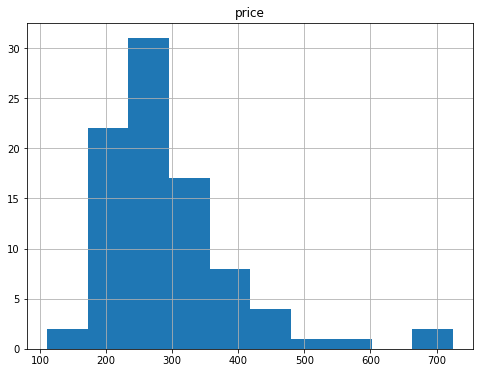

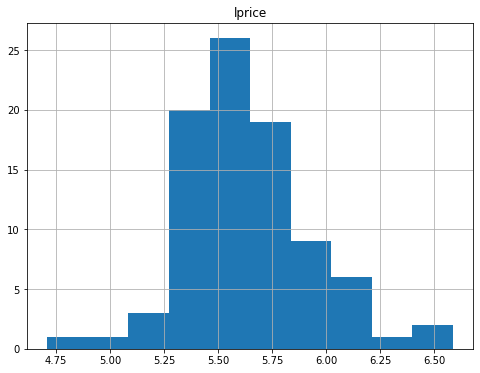

In [35]:
# 对数化对正态化的作用
## 以hprice1的price为例
### 未经对数化的直方图
hprice1.hist(column='price',figsize=(8,6))

### 对数化后的直方图
hprice1.hist(column='lprice',figsize=(8,6))

显然，对数化后的数据分布更接近正态分布！

### 4.2.2 二次项

老样子，一个例子讲明白二次项的作用！

**· Example10.** 直觉上看，职场里资历越老的人工资水平就越高，于是我们想知道某公司内员工工资水平与单位工作年限之前的关系。很自然地，我们会把模型简单地假设为
$$
wage=\beta _0+\beta _1exper+u
$$

但是，这个模型有一个暗含的前提：随着工作年限的提升，每年平均工资上升的幅度都相同。但现实中万恶的资本家不会那么便宜我们的，经验告诉我们，随着工作年限的上升，工资提升会逐渐变缓。也就是说，**工作年限**对工资水平的影响可能不是线性的，而是有一个“弧度”。如何让模型具备这个“弧度”呢？最简单也是最直观的方法就是，**在原模型的基础上**加入二次项
$$
wage=\beta _0+\beta _1exper+\beta _2exper^2+u
$$
假设经过OLS估计后，模型为
$$
\widehat{\text { wage }}=3.73+0.298 \text { exper }-0.006 \text { exper }^{2}
$$
第一年工资增加0.298单位，第二年增加0.286单位，第十年只能增加0.178单位，二次项验证了我们的猜想。

总结：如果我们在回归建模前认为某个自变量对因变量的影响不是线性的，可以尝试加入二次项，并观察二次项的显著性。如果显著，就说明两者关系确实为非线性的。

### 4.2.3 交互项

我们在定性变量章节介绍了定性变量之间以及定性与定量变量之间交互项的理解与意义，在这一小节我们介绍定量变量之间的交互项的理解。

定量变量间交互项的意义和之前的一样，若某一个变量对因变量的效应依赖于另一个自变量，则我们可以在模型中加入交互项。

**· Example11.** 我们用出勤百分比atndrte，读大学前的GPA、ACT来解释一批学生期末考试标准化的成绩。有人认为对于过去成绩不同的学生，出勤率可能具有不同的影响，于是我们在模型中加入两者的交互项
$$
\,\,\mathrm{stndfnl} =\beta _0+\beta _1\,\,\mathrm{atndrte} +\beta _2\,\,\mathrm{priGP} A+\beta _3ACT+\beta _4priGPA^2+\beta _5ACT^2+\beta _6priGPA\cdot \,\,\mathrm{atndrte} +u
\\
$$
在这里我们想提醒一下大家，在没有学习交互项、二次项的时候，我们会说自变量$x_i$的系数$\beta_i$是其对因变量$y$的偏效应，这是因为在全为一次项的模型中，$\frac{\Delta y}{\Delta x_i}$就等于系数$\beta_i$。而加入了交互项、二次项后，我们对存在交互项、二次项的自变量的系数解释就不会那么简单了。我们更关注问题的本质——$x_i$对因变量$y$的偏效应是多少，对于本例而言，出勤率对成绩的偏效应如下所示
$$
\frac{\Delta \text { stndfnl }}{\Delta a t n d r t e}=\beta_{1}+\beta_{6} \text { priGPA }
$$
可见，$priGPA$在不同取值下，出勤率对成绩的影响是不一样的。其实有了这个公式，我们可以计算出$priGPA$在不同取值下，出勤率对成绩偏效应的具体值，这一任务非常简单。但是涉及交互问题的假设检验就相对复杂一点，也非常有趣。通常来说，这类问题假设检验有如下两个

1. 出勤率对成绩的影响是否显著？对于这一问题，假设需要设置成这样
$$
H_0: \beta _1=\beta _6=0 \leftrightarrow \,\,H_1: H_0\text{不成立}
$$
很明显，我们用F检验即可。

In [36]:
attend=pd.read_stata('./data/attend.dta')
attend.head()

,attend,termgpa,priGPA,ACT,final,atndrte,hwrte,frosh,soph,skipped,stndfnl
0,27.0,3.19,2.64,23.0,28.0,84.375,100.0,0.0,1.0,5.0,0.472689
1,22.0,2.73,3.52,25.0,26.0,68.750,87.5,0.0,0.0,10.0,0.052521
2,30.0,3.00,2.46,24.0,30.0,93.750,87.5,0.0,0.0,2.0,0.892857
3,31.0,2.04,2.61,20.0,27.0,96.875,100.0,0.0,1.0,1.0,0.262605
4,32.0,3.68,3.32,23.0,34.0,100.000,100.0,0.0,1.0,0.0,1.733193


In [37]:
# 构建有约束、无约束模型
attend_lm_ur=sm.formula.ols('stndfnl~atndrte+priGPA+ACT+I(priGPA**2)+I(ACT**2)+I(priGPA*atndrte)',data=attend).fit()
attend_lm_r=sm.formula.ols('stndfnl~priGPA+ACT+I(priGPA**2)+I(ACT**2)',data=attend).fit()

# F检验
display(anova_lm(attend_lm_r,attend_lm_ur))
print('结果显著，可以拒绝原假设')

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,675.0,519.343813,0.0,NaN,NaN,NaN
1,673.0,512.762440,2.0,6.581373,4.319021,0.013684


结果显著，可以拒绝原假设


2. 当$priGPA$为一个具体的值时，出勤率在这个值下对对成绩的影响是否显著？

这个问题非常有趣，要回答这个问题，我们需要对原模型做一些小改变。假设我们想验证$priGPA=2.59$时出勤率的显著性，我们需要将原来的$priGPA$修改为$priGPA-2.59$。模型也将变成
$$
\,\,\mathrm{stndfnl}=\beta _0+\beta _1\,\,\mathrm{atndrte}+\beta _2\,\left( GPA-2.59 \right) +\beta _3ACT+\beta _4\left( priGPA-2.59 \right) ^2+\beta _5ACT^2+\beta _6\left( priGPA-2.59 \right) \cdot \,\,\mathrm{atndrte}+u
$$
我们根据这个模型求偏导会有
$$
\frac{\Delta \text { stndfnl }}{\Delta a t n d r t e}=\beta_{1}+\beta_{6} \text { (priGPA-2.59) }
$$
当$priGPA=2.59$时，偏效应正好就是$\beta_1$！我们只需要查看这个模型的$\beta_1$显著性就可以回答这一假设检验问题了。

In [38]:
attend['priGPA2']=attend['priGPA']-2.59
attend_lm2=sm.formula.ols('stndfnl~atndrte+priGPA2+ACT+I(priGPA2**2)+I(ACT**2)+I(priGPA2*atndrte)',data=attend).fit()
print(attend_lm2.summary())
print('结果显著，可以拒绝原假设')

                            OLS Regression Results                            
Dep. Variable:                stndfnl   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     33.25
Date:                Wed, 07 Sep 2022   Prob (F-statistic):           3.49e-35
Time:                        10:50:02   Log-Likelihood:                -868.90
No. Observations:                 680   AIC:                             1752.
Df Residuals:                     673   BIC:                             1783.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.1827 